<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_cluster_data(y_hat)_multi_delta_(_3_2)_n60_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-3.2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-3.2_n60.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,93.272004,0.000384,103.272387,103.272041,0.000346
1,0.0,1.0,29.743816,0.002271,39.746087,39.744264,0.001823
2,0.0,2.0,27.299652,0.003114,37.302766,37.300116,0.002649
3,0.0,3.0,50.009517,-0.001575,60.007942,60.009835,-0.001892
4,0.0,4.0,20.455806,0.004857,30.460663,30.456315,0.004349
...,...,...,...,...,...,...,...
59995,999.0,55.0,21.543760,-0.005499,31.538261,31.543719,-0.005458
59996,999.0,56.0,48.856577,0.001056,58.857633,58.856644,0.000990
59997,999.0,57.0,97.232631,0.000352,107.232983,107.232887,0.000095
59998,999.0,58.0,50.785330,0.000927,60.786257,60.785404,0.000853


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    93.272004  0.000384  103.272387  103.272041  0.000346
      1.0    29.743816  0.002271   39.746087   39.744264  0.001823
      2.0    27.299652  0.003114   37.302766   37.300116  0.002649
      3.0    50.009517 -0.001575   60.007942   60.009835 -0.001892
      4.0    20.455806  0.004857   30.460663   30.456315  0.004349
...                ...       ...         ...         ...       ...
999.0 55.0   21.543760 -0.005499   31.538261   31.543719 -0.005458
      56.0   48.856577  0.001056   58.857633   58.856644  0.000990
      57.0   97.232631  0.000352  107.232983  107.232887  0.000095
      58.0   50.785330  0.000927   60.786257   60.785404  0.000853
      59.0   87.769832 -0.001449   97.768382   97.770051 -0.001669

[60000 rows x 5 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    93.272004  0.000384  103.272387  103.272041  0.000346
      1.0    29.743816  0.002271   39.746087   39.744264  0.001823
      2.0    27.299652  0.003114   37.302766   37.300116  0.002649
      3.0    50.009517 -0.001575   60.007942   60.009835 -0.001892
      4.0    20.455806  0.004857   30.460663   30.456315  0.004349
...                ...       ...         ...         ...       ...
999.0 55.0   21.543760 -0.005499   31.538261   31.543719 -0.005458
      56.0   48.856577  0.001056   58.857633   58.856644  0.000990
      57.0   97.232631  0.000352  107.232983  107.232887  0.000095
      58.0   50.785330  0.000927   60.786257   60.785404  0.000853
      59.0   87.769832 -0.001449   97.768382   97.770051 -0.001669

[60000 rows x 5 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,93.272004,0.000384,103.272387,103.272041,0.000346
1,0.0,1.0,29.743816,0.002271,39.746087,39.744264,0.001823
2,0.0,2.0,27.299652,0.003114,37.302766,37.300116,0.002649
3,0.0,3.0,50.009517,-0.001575,60.007942,60.009835,-0.001892
4,0.0,4.0,20.455806,0.004857,30.460663,30.456315,0.004349
...,...,...,...,...,...,...,...
59995,999.0,55.0,21.543760,-0.005499,31.538261,31.543719,-0.005458
59996,999.0,56.0,48.856577,0.001056,58.857633,58.856644,0.000990
59997,999.0,57.0,97.232631,0.000352,107.232983,107.232887,0.000095
59998,999.0,58.0,50.785330,0.000927,60.786257,60.785404,0.000853


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         e           Y       y_hat     e_hat
rep   index                                                       
0.0   0.0    93.272004  0.000384  103.272387  103.272041  0.000346
      1.0    29.743816  0.002271   39.746087   39.744264  0.001823
      2.0    27.299652  0.003114   37.302766   37.300116  0.002649
      3.0    50.009517 -0.001575   60.007942   60.009835 -0.001892
      4.0    20.455806  0.004857   30.460663   30.456315  0.004349
...                ...       ...         ...         ...       ...
999.0 55.0   21.543760 -0.005499   31.538261   31.543719 -0.005458
      56.0   48.856577  0.001056   58.857633   58.856644  0.000990
      57.0   97.232631  0.000352  107.232983  107.232887  0.000095
      58.0   50.785330  0.000927   60.786257   60.785404  0.000853
      59.0   87.769832 -0.001449   97.768382   97.770051 -0.001669

[60000 rows x 5 columns]

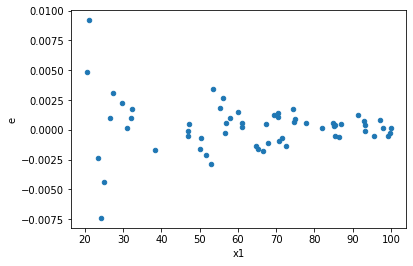

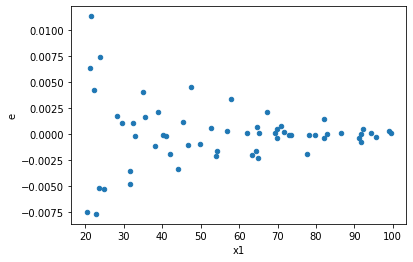

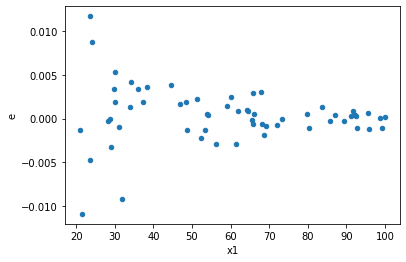

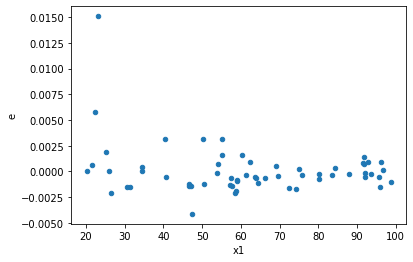

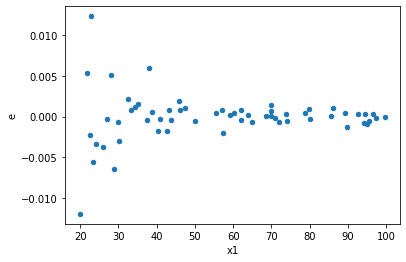

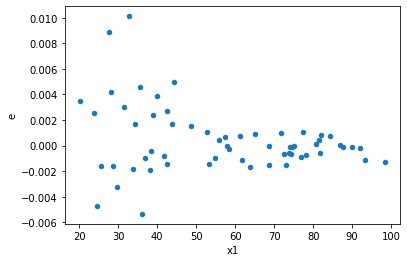

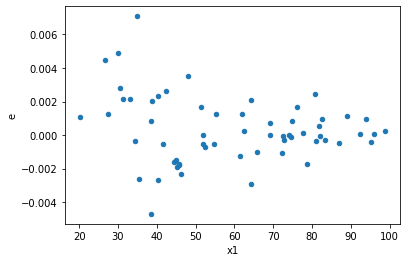

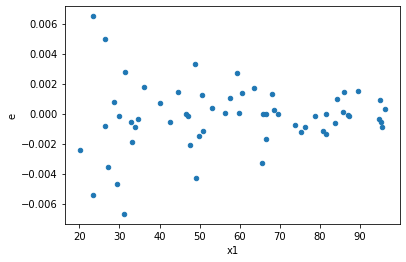

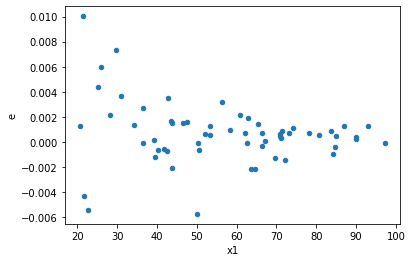

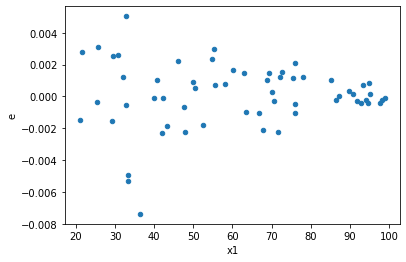

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,31.0,27.0,2.5892161746042855e-05,0.0002464963099914389,8.352310240658986e-07,9.129492962645885e-06,10.93050030421952,1.4744258702847901e-08,0.9999999926278706,7.3721293514239505e-09,Reject001=0 : Heteroscedasticity
7.0,29.0,29.0,4.1590282571330335e-05,0.0002349479661050949,1.4341476748734598e-06,8.101654003623963e-06,5.649107233213485,1.20834625272348e-05,0.9999939582687364,6.0417312636174e-06,Reject001=0 : Heteroscedasticity
8.0,29.0,29.0,3.22147734618133e-05,0.0003043149865046165,1.110854257303907e-06,1.0493620224297122e-05,9.446441920982153,3.743888221663383e-08,0.9999999812805589,1.8719441108316914e-08,Reject001=0 : Heteroscedasticity
11.0,28.0,30.0,2.075668448075272e-05,0.001290030928899571,7.413101600268828e-07,4.300103096331903e-05,58.00680104230548,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
13.0,24.0,34.0,2.3195586954764737e-05,0.000267373278259478,9.66482789781864e-07,7.863919948808177e-06,8.136637332758994,6.654747908285685e-08,0.9999999667262605,3.3273739541428426e-08,Reject001=0 : Heteroscedasticity
16.0,26.0,32.0,1.864627486236777e-05,0.0009365571623786435,7.171644177833758e-07,2.926741132433261e-05,40.809904393741164,2.220446049250313e-16,0.9999999999999999,1.1102230246251565e-16,Reject001=0 : Heteroscedasticity
19.0,32.0,26.0,6.16327920768659e-05,0.0005782164170639588,1.9260247524020593e-06,2.2239092963998416e-05,11.546628845897608,1.2500998236575356e-08,0.9999999937495009,6.250499118287678e-09,Reject001=0 : Heteroscedasticity
20.0,31.0,27.0,1.4881451589750299e-05,0.0002810810624738062,4.800468254758161e-07,1.0410409721252082e-05,21.686238026745457,3.866240660954645e-12,0.9999999999980669,1.9331203304773226e-12,Reject001=0 : Heteroscedasticity
22.0,30.0,28.0,3.706898146979201e-05,0.00027425841179845774,1.2356327156597337e-06,9.794943278516348e-06,7.9270669628446955,3.921837652409721e-07,0.9999998039081174,1.9609188262048605e-07,Reject001=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,31.0,27.0,2.5892161746042855e-05,0.0002464963099914389,8.352310240658986e-07,9.129492962645885e-06,10.93050030421952,1.4744258702847901e-08,Reject001=0 : Heteroscedasticity
1.0,28.0,30.0,0.0005187715008422626,3.6025996935397274e-05,1.852755360150938e-05,1.2008665645132425e-06,0.06481517151921298,1.4426264117256016e-10,Reject001=0 : Heteroscedasticity
2.0,27.0,31.0,0.0005742145491227214,4.848136001441124e-05,2.126720552306376e-05,1.563914839174556e-06,0.0735364520495431,1.1435617260929335e-09,Reject001=0 : Heteroscedasticity
3.0,35.0,23.0,0.00030694316883943143,1.427044027662745e-05,8.769804823983756e-06,6.204539250707587e-07,0.0707488863804511,2.3918572150865306e-11,Reject001=0 : Heteroscedasticity
4.0,28.0,30.0,0.0005045597323731313,1.577345851949766e-05,1.801999044189755e-05,5.25781950649922e-07,0.02917770419164306,4.7863296139888774e-15,Reject001=0 : Heteroscedasticity
5.0,28.0,30.0,0.0003516498176654856,1.8730581193796288e-05,1.255892205948163e-05,6.243527064598763e-07,0.049713876995399274,5.048212240787416e-12,Reject001=0 : Heteroscedasticity
6.0,29.0,29.0,0.00017026493337703064,3.4587729753673904e-05,5.871204599207953e-06,1.1926803363335828e-06,0.2031406530262086,4.934258228310249e-05,Reject001=0 : Heteroscedasticity
7.0,29.0,29.0,4.1590282571330335e-05,0.0002349479661050949,1.4341476748734598e-06,8.101654003623963e-06,5.649107233213485,1.20834625272348e-05,Reject001=0 : Heteroscedasticity
8.0,29.0,29.0,3.22147734618133e-05,0.0003043149865046165,1.110854257303907e-06,1.0493620224297122e-05,9.446441920982153,3.743888221663383e-08,Reject001=0 : Heteroscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64